In [1]:
using AlgebraicStockFlow

using LabelledArrays
using OrdinaryDiffEq
using Plots
using JSON

using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

using LabelledArrays
using LinearAlgebra: mul!

using Catlab.WiringDiagrams
using Catlab.Programs.RelationalPrograms

┌ Info: Precompiling AlgebraicStockFlow [58c4a0e8-2944-4d18-9fa2-e17726aee9e5]
└ @ Base loading.jl:1317


In [2]:
# define the function of the dynamical variables
f_birth(u,uN,t)=0.001*uN.N(u,t)
f_inf(u,uN,t)= 0.1*u.S*u.I/uN.N(u,t)
f_rec(u,uN,t)=0.05*u.I
f_deathS(u,uN,t)=u.S*0.001
f_deathI(u,uN,t)=u.I*0.001
f_deathR(u,uN,t)=u.R*0.001
f_fractionNonS(u,uN,t)=(u.S+u.R)/uN.N(u,t)

f_fractionNonS (generic function with 1 method)

In [3]:
#(stock_name, initialvalue)=>(inflows, outflows, variables, svariables)
sir_StockAndFlow=StockAndFlow(
    ((:S, 990)=>(:birth,(:inf,:deathS),(:v_inf,:v_deathS),:N), (:I, 10)=>(:inf,(:rec,:deathI),(:v_inf, :v_rec,:v_deathI,:v_fractionNonS),:N),(:R, 0)=>(:rec,:deathR,(:v_deathR,:v_fractionNonS),:N)),
    (:birth=>:v_birth,:inf=>:v_inf,:rec=>:v_rec,:deathS=>:v_deathS,:deathI=>:v_deathI,:deathR=>:v_deathR),
    (:v_birth=>f_birth,:v_inf=>f_inf,:v_rec=>f_rec,:v_deathS=>f_deathS,:v_deathI=>f_deathI,:v_deathR=>f_deathR,:v_fractionNonS=>f_fractionNonS),
    (:N=>(:v_birth,:v_inf,:v_fractionNonS))
)


StockAndFlow with elements S = 1:3, SV = 1:1, LS = 1:3, F = 1:6, I = 1:3, O = 1:5, V = 1:7, LV = 1:8, LSV = 1:3
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │           10 │     I │
│ 3 │            0 │     R │
└───┴──────────────┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │  birth │
│ 2 │  2 │    inf │
│ 3 │  3 │    rec │
│ 4 │  4 │ deathS │
│ 5 │  5 │ deathI │
│ 6 │  6 │ deathR │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
└───┴─────┴────┘
┌───┬────────────────┬────────────────┐
│ V │      funcDynam │          vname │
├───┼────────────────┼────────────────┤
│ 1 │        f_birth │        v_birth │
│ 2 │          f_inf │          v_inf │
│ 3 │          f_rec │          v_rec │
│ 4 │       f_deathS │       v_deathS │
│ 5 │       f_deathI │       v_deathI │
│ 6 │       f_deathR │       v_deathR │
│ 7 │ f_fractionNonS │ v_fractionNonS │
└───┴────────────────┴────────────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   2 │
│  2 │   1 │   4 │
│  3 │   2 │   2 │
│  4 │   2 │   3 │
│  5 │   2 │   5 │
│  6 │   2 │   7 │
│  7 │   3 │   6 │
│  8 │   3 │   7 │
└────┴─────┴─────┘
┌─────┬───────┬──────┐
│ LSV │ lsvsv │ lsvv │
├─────┼───────┼──────┤
│   1 │     1 │    1 │
│   2 │     1 │    2 │
│   3 │     1 │    7 │
└─────┴───────┴──────┘

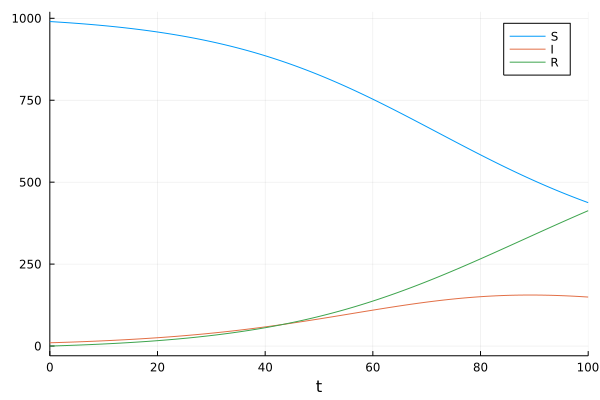

In [4]:
prob = ODEProblem(vectorfield(sir_StockAndFlow),initialValues(sir_StockAndFlow),(0.0,100.0),funcFlows(sir_StockAndFlow));
sol = solve(prob,Tsit5(),abstol=1e-8);
plot(sol)

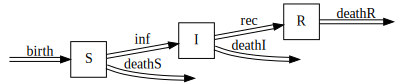

In [5]:
# only include Stocks and flows for the schema C
Graph(sir_StockAndFlow; type="SF")

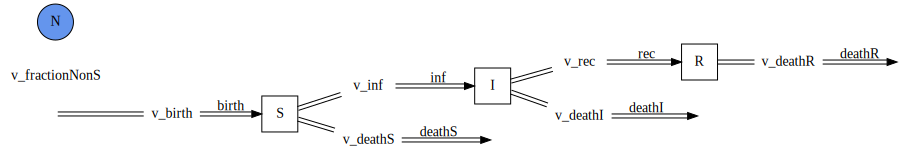

In [6]:
# Not include links for the schema C, this shows the relationship of V and F
Graph(sir_StockAndFlow; type="SFV")

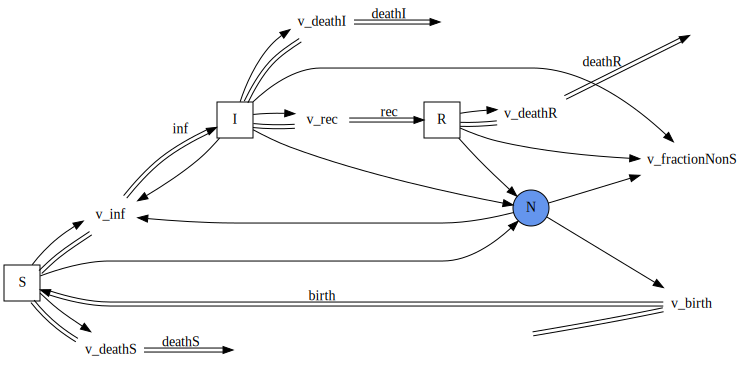

In [7]:
# Include all for the schema C
Graph(sir_StockAndFlow)

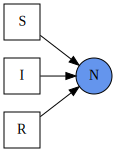

In [8]:
# there is a trick we can also plot schema C only with the components of schema C0 -- only includes stocks, flows and links between stocks and flows
Graph(sir_StockAndFlow; schema="C0")

# Composition

## define the small part need to be composed

In [9]:
SN0=StockAndFlow0(((:S,990)=>:N),:N)

StockAndFlow0 with elements S = 1:1, SV = 1:1, LS = 1:1
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
└───┴──────────────┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
└────┴─────┴──────┘

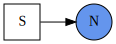

In [10]:
# for schema C0, all the three components will always be plotted out
Graph(SN0; schema="C0")

# define the SN0 in the full schema

In [11]:
SN0_full=StockAndFlow(
    ((:S, 990)=>(:F_NONE,:F_NONE,:V_NONE,:N)),
    (),
    (),
    (:N=>:SVV_NONE)
)

StockAndFlow with elements S = 1:1, SV = 1:1, LS = 1:1, F = 1:0, I = 1:0, O = 1:0, V = 1:0, LV = 1:0, LSV = 1:0
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
└───┴──────────────┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
└────┴─────┴──────┘

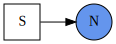

In [12]:
Graph(SN0_full)

In [13]:
sir_StockAndFlow0=StockAndFlow0(
    ((:S, 990)=>:N, (:I, 10)=>:N,(:R, 0)=>:N),:N
)

StockAndFlow0 with elements S = 1:3, SV = 1:1, LS = 1:3
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │           10 │     I │
│ 3 │            0 │     R │
└───┴──────────────┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘

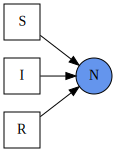

In [14]:
Graph(sir_StockAndFlow0; schema="C0")

In [15]:
using Catlab.CategoricalAlgebra.CSets

In [16]:
α0 = ACSetTransformation((S=[1], LS=[1], SV=[1]), SN0, sir_StockAndFlow0)

ACSetTransformation((S = FinFunction([1], 1, 3), SV = FinFunction([1], 1, 1), LS = FinFunction([1], 1, 3)), StockAndFlowUntyped0 {S = 1, SV = 1, LS = 1}, StockAndFlowUntyped0 {S = 3, SV = 1, LS = 3})

In [17]:
α0_null = ACSetTransformation((S=[2], LS=[2], SV=[1]), SN0, sir_StockAndFlow0)

ACSetTransformation((S = FinFunction([2], 1, 3), SV = FinFunction([1], 1, 1), LS = FinFunction([2], 1, 3)), StockAndFlowUntyped0 {S = 1, SV = 1, LS = 1}, StockAndFlowUntyped0 {S = 3, SV = 1, LS = 3})

In [29]:
# Question??
# example: create(initial(FinSet{Int}), FinSet(3)) == FinFunction(Int[], 3)
# so it seems the define of α0_null is
α0_null_true = ACSetTransformation((S=FinFunction(Int[], 3), LS=FinFunction(Int[], 3), SV=FinFunction(Int[], 1)), SN0, sir_StockAndFlow0)

LoadError: Domain error in component S

In [30]:
FinFunction(Int[], 3)

FinFunction(Int64[], 0, 3)

In [17]:
α = ACSetTransformation((S=[1], LS=[1], SV=[1]), SN0_full, sir_StockAndFlow)

ACSetTransformation((S = FinFunction([1], 1, 3), SV = FinFunction([1], 1, 1), LS = FinFunction([1], 1, 3), F = FinFunction(1:0, 0, 6), I = FinFunction(1:0, 0, 3), O = FinFunction(1:0, 0, 5), V = FinFunction(1:0, 0, 7), LV = FinFunction(1:0, 0, 8), LSV = FinFunction(1:0, 0, 3)), StockAndFlowUntyped {S = 1, SV = 1, LS = 1, F = 0, I = 0, O = 0, V = 0, LV = 0, LSV = 0}, StockAndFlowUntyped {S = 3, SV = 1, LS = 3, F = 6, I = 3, O = 5, V = 7, LV = 8, LSV = 3})

In [18]:
f_vacc(u,uN,t)=u.S*0.01
f_deathV(u,uN,t)=u.V*0.001

f_deathV (generic function with 1 method)

In [19]:
sv_StockAndFlow=StockAndFlow(
    ((:S, 990)=>(:F_NONE,:vacc,:v_vacc,:N), (:V, 0)=>(:vacc,:deathV,:v_deathV,:N)),
    (:vacc=>:v_vacc,:deathV=>:v_deathV),
    (:v_vacc=>f_vacc,:v_deathV=>f_deathV),
    (:N=>:SVV_NONE)
)

StockAndFlow with elements S = 1:2, SV = 1:1, LS = 1:2, F = 1:2, I = 1:1, O = 1:2, V = 1:2, LV = 1:2, LSV = 1:0
┌───┬──────────────┬───────┐
│ S │ initialValue │ sname │
├───┼──────────────┼───────┤
│ 1 │          990 │     S │
│ 2 │            0 │     V │
└───┴──────────────┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │   vacc │
│ 2 │  2 │ deathV │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
└───┴─────┴────┘
┌───┬───────────┬──────────┐
│ V │ funcDynam │    vname │
├───┼───────────┼──────────┤
│ 1 │    f_vacc │   v_vacc │
│ 2 │  f_deathV │ v_deathV │
└───┴───────────┴──────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   1 │
│  2 │   2 │   2 │
└────┴─────┴─────┘

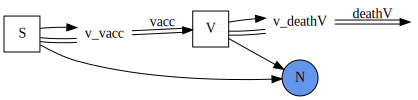

In [20]:
Graph(sv_StockAndFlow)

In [21]:
β0=ACSetTransformation((S=[1], LS=[1], SV=[1]), SN0, sir_StockAndFlow0)

ACSetTransformation((S = FinFunction([1], 1, 3), SV = FinFunction([1], 1, 1), LS = FinFunction([1], 1, 3)), StockAndFlowUntyped0 {S = 1, SV = 1, LS = 1}, StockAndFlowUntyped0 {S = 3, SV = 1, LS = 3})

In [22]:
β0_null=ACSetTransformation((S=[2], LS=[2], SV=[1]), SN0, sir_StockAndFlow0)

ACSetTransformation((S = FinFunction([2], 1, 3), SV = FinFunction([1], 1, 1), LS = FinFunction([2], 1, 3)), StockAndFlowUntyped0 {S = 1, SV = 1, LS = 1}, StockAndFlowUntyped0 {S = 3, SV = 1, LS = 3})

In [21]:
β=ACSetTransformation((S=[1], LS=[1], SV=[1]), SN0_full, sv_StockAndFlow)

ACSetTransformation((S = FinFunction([1], 1, 2), SV = FinFunction([1], 1, 1), LS = FinFunction([1], 1, 2), F = FinFunction(1:0, 0, 2), I = FinFunction(1:0, 0, 1), O = FinFunction(1:0, 0, 2), V = FinFunction(1:0, 0, 2), LV = FinFunction(1:0, 0, 2), LSV = FinFunction(1:0, 0, 0)), StockAndFlowUntyped {S = 1, SV = 1, LS = 1, F = 0, I = 0, O = 0, V = 0, LV = 0, LSV = 0}, StockAndFlowUntyped {S = 2, SV = 1, LS = 2, F = 2, I = 1, O = 2, V = 2, LV = 2, LSV = 0})

In [22]:
α_null = ACSetTransformation((S=[2], LS=[2], SV=[1]), SN0_full, sir_StockAndFlow)

ACSetTransformation((S = FinFunction([2], 1, 3), SV = FinFunction([1], 1, 1), LS = FinFunction([2], 1, 3), F = FinFunction(1:0, 0, 6), I = FinFunction(1:0, 0, 3), O = FinFunction(1:0, 0, 5), V = FinFunction(1:0, 0, 7), LV = FinFunction(1:0, 0, 8), LSV = FinFunction(1:0, 0, 3)), StockAndFlowUntyped {S = 1, SV = 1, LS = 1, F = 0, I = 0, O = 0, V = 0, LV = 0, LSV = 0}, StockAndFlowUntyped {S = 3, SV = 1, LS = 3, F = 6, I = 3, O = 5, V = 7, LV = 8, LSV = 3})

In [23]:
β_null=ACSetTransformation((S=[2], LS=[2], SV=[1]), SN0_full, sv_StockAndFlow)

ACSetTransformation((S = FinFunction([2], 1, 2), SV = FinFunction([1], 1, 1), LS = FinFunction([2], 1, 2), F = FinFunction(1:0, 0, 2), I = FinFunction(1:0, 0, 1), O = FinFunction(1:0, 0, 2), V = FinFunction(1:0, 0, 2), LV = FinFunction(1:0, 0, 2), LSV = FinFunction(1:0, 0, 0)), StockAndFlowUntyped {S = 1, SV = 1, LS = 1, F = 0, I = 0, O = 0, V = 0, LV = 0, LSV = 0}, StockAndFlowUntyped {S = 2, SV = 1, LS = 2, F = 2, I = 1, O = 2, V = 2, LV = 2, LSV = 0})

In [24]:
Open{DiscreteACSet}(sir_StockAndFlow, α0_null,α0)

LoadError: UndefVarError: AbstractDiscreteACSet not defined

In [31]:
Open(sir_StockAndFlow, α0_null,α0)

LoadError: UndefVarError: L not defined

In [34]:
import Pkg
Pkg.status()

nothing

In [35]:
pathof(Catlab)

"/Users/xiaoyanli/.julia/dev/Catlab/src/Catlab.jl"